In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers, initializers, regularizers, metrics

In [ ]:
# seed 설정
seed = 3

np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip = True, # 수평 대칭 이미지를 50% 확률로 만들어 추가
                                   width_shift_range = 0.1, # 전체 크기의 10% 범위에서 좌우로 이동
                                   height_shift_range = 0.1, # 마찬가지로 위아래로 이동
                                   # rotation_range = 5,
                                   # shear_range = 0.7,
                                   # zoom_range = [0.9, 2.2]
                                   # vertical_flip = True,
                                   fill_mode = "nearest")

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
cd gdrive/My\ Drive/모두의\ 딥러닝/run_project

/content/gdrive/My Drive/모두의 딥러닝/run_project


In [ ]:
ls

01_My_First_Deeplearning.ipynb     15_MNIST_Simple.ipynb
02_Pima_Indian.ipynb               16_MNIST_Deep.ipynb
03_Iris_Multi_Calssfication.ipynb  17_1_NLP.ipynb
04_Sonar.ipynb                     17_NLP.ipynb
05_Sonar_Train_Test.ipynb          18_RNN1_Reuters.ipynb
06-Sonar-Save-Model.ipynb          19_RNN2_imdb_lstm.ipynb
07_Sonar-K-fold.ipynb              20_GAN.ipynb
08_Wine.ipynb                      21_Autoencoder.ipynb
09_Wine_Checkpoint.ipynb           22_Data_Augmentation1.ipynb
10_Wine_Overfit_Graph.ipynb        23_Transfer_Learning.ipynb
11_Wine_Early_Stop.ipynb           pima_graph.ipynb
12_Wine_Check_and_Stop1.ipynb      test/
13_Boston.ipynb                    train/
14_MNIST_Data.ipynb


In [ ]:
train_generator = train_datagen.flow_from_directory(
    "./train", # 학습셋이 있는 폴더 위치
    target_size = (150, 150),
    batch_size = 4,
    class_mode = "binary"
)

Found 160 images belonging to 2 classes.


In [ ]:
# 테스트셋은 이미지 부풀리기 과정을 진행하지 않음
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    "./test", # 테스트 셋이 있는 폴더 위치
    target_size = (150, 150),
    batch_size = 4,
    class_mode = "binary")

Found 120 images belonging to 2 classes.


In [ ]:
# 앞서 배운 CNN 모델을 만들어 적용하기
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (150, 150, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(2))
model.add(Activation("sigmoid"))

In [ ]:
# 모델 컴파일
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = optimizers.Adam(learning_rate=0.0002),
              metrics = ["accuracy"])

In [ ]:
# 모델 실행
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 40,
    epochs = 20,
    validation_data = test_generator,
    validation_steps = 4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
40/40 [==============================] - 1s 28ms/step - loss: 0.7039 - accuracy: 0.5000 - val_loss: 0.6905 - val_accuracy: 0.5000
Epoch 2/20
40/40 [==============================] - 1s 26ms/step - loss: 0.6850 - accuracy: 0.5562 - val_loss: 0.6822 - val_accuracy: 0.5625
Epoch 3/20
40/40 [==============================] - 1s 26ms/step - loss: 0.6901 - accuracy: 0.5250 - val_loss: 0.6768 - val_accuracy: 0.7500
Epoch 4/20
40/40 [==============================] - 1s 26ms/step - loss: 0.6886 - accuracy: 0.5562 - val_loss: 0.6653 - val_accuracy: 0.8125
Epoch 5/20
40/40 [==============================] - 1s 26ms/step - loss: 0.6804 - accuracy: 0.6250 - val_loss: 0.6518 - val_accuracy: 0.5625
Epoch 6/20
40/40 [==============================] - 1s 27ms/step - loss: 0.6474 - accuracy: 0.6750 - val_loss: 0.6060 - val_accuracy: 0.6250
Epoch 7/20
40/40 [==============================] - 1s 26ms/step - loss: 0.630

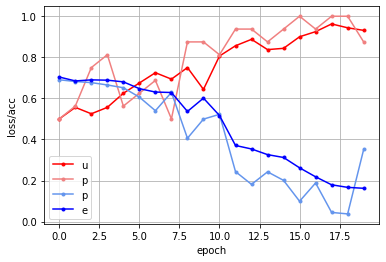

In [ ]:
# 결과를 그래프로 표현하는 부분
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
y_vloss = history.history["val_loss"]
y_loss = history.history["loss"]

x_len = np.arange(len(y_loss))
plt.plot(x_len, acc, marker = ".", c = "red", label = "Trainset_acc")
plt.plot(x_len, val_acc, marker = ".", c = "lightcoral", label ="Testset_acc")
plt.plot(x_len, y_vloss, marker = ".", c = "cornflowerblue", label = "Trainset_loss")
plt.plot(x_len, y_loss, marker = ".", c = "blue", label = "Trainset_loss")

plt.legend("upper right")
plt.grid()
plt.xlabel("epoch")
plt.ylabel("loss/acc")
plt.show()